<a href="https://colab.research.google.com/github/T1Duff/versioned_dir/blob/main/Heart_attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [ ]:
#Imports for dataset handeling and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Data Set
df = pd.read_csv("heart_attack.csv")

In [ ]:
#Imports for splitting data, scaling data and dealing with over sampling

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler

In [ ]:
#Imports for Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
#Import for Model Comparison
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score

##Preproccessing

In [ ]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,HvyAlcoholConsump,MentHlth,PhysHlth,Sex,Age,Education,Income
0,0,1,1,1,40.0,1,0,0,0,0,18,15,0,9,4,3
1,0,0,0,0,25.0,1,0,0,1,0,0,0,0,7,6,1
2,0,1,1,1,28.0,0,0,0,0,0,30,30,0,9,4,8
3,0,1,0,1,27.0,0,0,0,1,0,0,0,0,11,3,6
4,0,1,1,1,24.0,0,0,0,1,0,3,0,0,11,5,4


In [ ]:
df.dtypes

HeartDiseaseorAttack      int64
HighBP                    int64
HighChol                  int64
CholCheck                 int64
BMI                     float64
Smoker                    int64
Stroke                    int64
Diabetes                  int64
PhysActivity              int64
HvyAlcoholConsump         int64
MentHlth                  int64
PhysHlth                  int64
Sex                       int64
Age                       int64
Education                 int64
Income                    int64
dtype: object

In [ ]:
#Checking for Null values
df.isnull().sum()

HeartDiseaseorAttack     0
HighBP                   0
HighChol                 0
CholCheck                0
BMI                     10
Smoker                   0
Stroke                   0
Diabetes                 0
PhysActivity             0
HvyAlcoholConsump        0
MentHlth                 0
PhysHlth                 0
Sex                      0
Age                      0
Education                0
Income                   0
dtype: int64

In [ ]:
 #Filling null values with the mean of each group
 for col in df:
  df[col].fillna( df[col].mean(), inplace = True)


In [ ]:
df.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
HvyAlcoholConsump       0
MentHlth                0
PhysHlth                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

##Data Selection

In [ ]:
#Setting target variable
target = 'HeartDiseaseorAttack'

In [ ]:
#Splitting the dataset to give my X and Y datasets
Y = df[target]

X = df.drop(target, axis = 1)

In [ ]:
Y.value_counts() #Need SMOTE as different classes are overbalanced

0    117842
1     12156
Name: HeartDiseaseorAttack, dtype: int64

In [ ]:
#Splitting the data into test and train data and then using synthetic oversampling
#to balance the classes
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
oversample = SMOTE()

X_train_sm, Y_train_sm = oversample.fit_resample(X_train, Y_train)

In [ ]:
count = Counter(Y_train_sm)
print(count)

Counter({0: 88346, 1: 88346})


In [ ]:
#Scaling the data to allow for better predictions
tran = StandardScaler()
X_train_sm = tran.fit_transform(X_train_sm)
X_test = tran.transform(X_test)

##Correlation and data selection


In [ ]:
 df_corr = df.corr(method = 'pearson')

In [ ]:
#Checking correlation for each group
df_corr['HeartDiseaseorAttack']

HeartDiseaseorAttack    1.000000
HighBP                  0.211181
HighChol                0.177354
CholCheck               0.042719
BMI                     0.050604
Smoker                  0.112623
Stroke                  0.204792
Diabetes                0.182306
PhysActivity           -0.086752
HvyAlcoholConsump      -0.027081
MentHlth                0.066010
PhysHlth                0.180468
Sex                     0.085814
Age                     0.218192
Education              -0.098555
Income                 -0.139747
Name: HeartDiseaseorAttack, dtype: float64

##KN


In [ ]:
#Initialising, fitting and predicting with KNN
KN = KNeighborsClassifier()

In [ ]:
KN.fit(X_train_sm, Y_train_sm)

KNeighborsClassifier()

In [ ]:
KN_pred = KN.predict(X_test)


<Axes: >

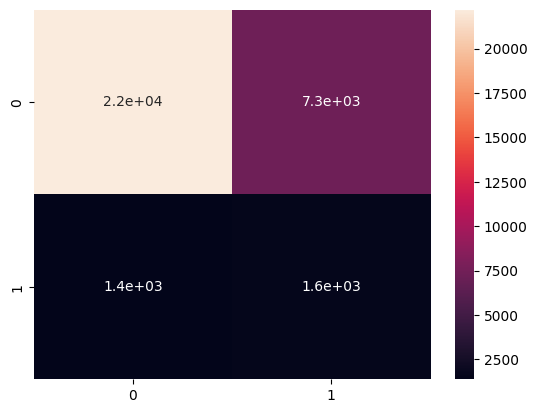

In [ ]:
#Confusion Matrix of KNN predictions
KN_cm = confusion_matrix(Y_test, KN_pred)
sns.heatmap(KN_cm, annot = True)

In [ ]:
#Accuracy of 73% for KNN, but precision of 0.18 and therefore poor predictor of
#Heart Attack
print(classification_report(Y_test, KN_pred))
print('F1-score for KNN: ', round(f1_score(Y_test, KN_pred),2))

              precision    recall  f1-score   support

           0       0.94      0.75      0.84     29496
           1       0.18      0.54      0.27      3004

    accuracy                           0.73     32500
   macro avg       0.56      0.65      0.55     32500
weighted avg       0.87      0.73      0.78     32500

F1-score for KNN:  0.27


In [ ]:
KN_a  = accuracy_score(Y_test, KN_pred)
print(KN_a)

0.7328923076923077


##Decision Tree


In [ ]:
#Initialising, fitting and predicting with a decision tree
DT = DecisionTreeClassifier(random_state = 0)

In [ ]:
DT.fit(X_train_sm, Y_train_sm)

DecisionTreeClassifier(random_state=0)

<Axes: >

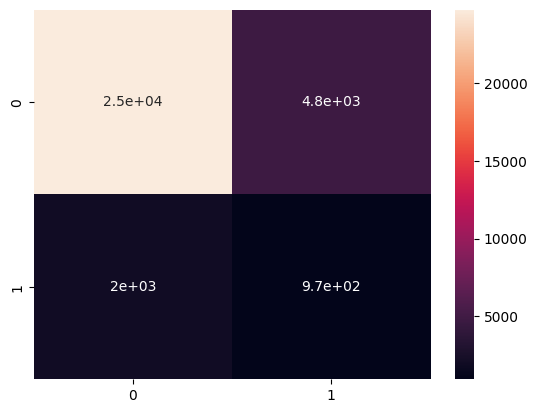

In [ ]:
DT_pred = DT.predict(X_test)
DT_cm = confusion_matrix(Y_test, DT_pred)
sns.heatmap(DT_cm, annot = True)

In [ ]:
#Again okay accuracy of 85% but poor preicions and F1 score showing poor predictive ability of heart attack
print(classification_report(Y_test,DT_pred))
print('F1-score for DT: ', round(f1_score(Y_test, DT_pred),2))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88     29496
           1       0.17      0.32      0.22      3004

    accuracy                           0.79     32500
   macro avg       0.55      0.58      0.55     32500
weighted avg       0.85      0.79      0.82     32500

F1-score for DT:  0.22


In [ ]:
DT_a  = accuracy_score(Y_test, DT_pred)
print(DT_a)

0.79


##Random Forest

In [ ]:
#Initialising, fitting and predicting random forest model
RF = RandomForestClassifier(random_state = 0)

In [ ]:
RF.fit(X_train_sm, Y_train_sm)

RandomForestClassifier(random_state=0)

<Axes: >

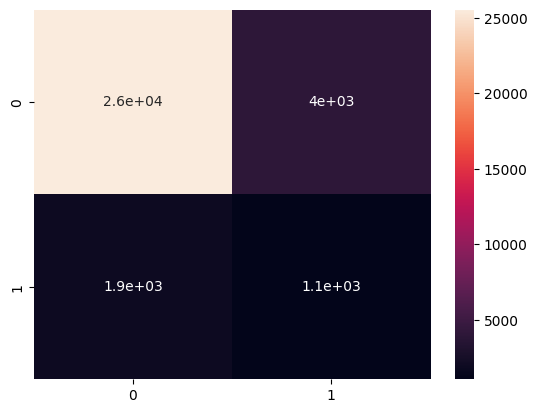

In [ ]:
RF_pred = RF.predict(X_test)
RF_cm = confusion_matrix(Y_test, RF_pred)
sns.heatmap( RF_cm, annot = True)

In [ ]:
#okay accuracy and poor precision and F1 score
print(classification_report(Y_test, RF_pred))
print('F1-score for RF: ', round(f1_score(Y_test, RF_pred),2))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90     29496
           1       0.21      0.36      0.27      3004

    accuracy                           0.82     32500
   macro avg       0.57      0.61      0.58     32500
weighted avg       0.86      0.82      0.84     32500

F1-score for RF:  0.27


In [ ]:
RF_a  = accuracy_score(Y_test, RF_pred)
print(RF_a)

0.8190153846153846


##ANN

In [ ]:
#Initialising, fitting and predicting with a atrificial MLP classifier
MLP = MLPClassifier(random_state = 0,
                    )

In [ ]:
MLP.fit(X_train_sm, Y_train_sm)

MLPClassifier(activation='logistic', hidden_layer_sizes=50, random_state=0)

<Axes: >

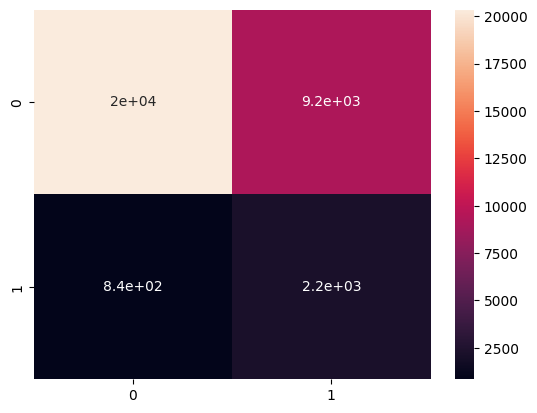

In [ ]:
MLP_pred = MLP.predict(X_test)
MLP_cm = confusion_matrix(Y_test, MLP_pred)
sns.heatmap(MLP_cm, annot = True)

In [ ]:
#okay accuracy, poor F1 and poor precision
print(classification_report(Y_test, MLP_pred))
print('F1-score for MLP: ', round(f1_score(Y_test, MLP_pred),2))

              precision    recall  f1-score   support

           0       0.96      0.69      0.80     29496
           1       0.19      0.72      0.30      3004

    accuracy                           0.69     32500
   macro avg       0.58      0.70      0.55     32500
weighted avg       0.89      0.69      0.76     32500

F1-score for MLP:  0.3


In [ ]:
MLP_a  = accuracy_score(Y_test, MLP_pred)
print(MLP_a)

0.6924307692307692


##Comparisons

In [ ]:
#Naming variables with f1 scores of each model
KNF = f1_score(Y_test, KN_pred)
DTF = f1_score(Y_test, DT_pred)
RFF = f1_score(Y_test, RF_pred)
MLPF = f1_score(Y_test, MLP_pred)

In [ ]:
acc_score = [KN_a, DT_a, RF_a, MLP_a]
models = ['KNN','DT','RF','MLP']
f1_scores = [KNF, DTF, RFF, MLPF]

In [ ]:
#Making a dataframe of the models and their accuracy and F1 score
comp = pd.DataFrame({'Algorithm': models, 'Accuracy Score': acc_score})
comp.index = models
compf = pd.DataFrame({'Algorithm': models, 'F1 Score': f1_scores})


In [ ]:
#Random forrest has the higest accuracy out of the group, however all models have
#low F1 scores, showing poor prediction accross the two classes (heart attack or no heart attack)
#Each model will need hyperparameter tuning or a different data set needed
comp.sort_values(by = 'Accuracy Score', ascending = False)

,Algorithm,Accuracy Score
RF,RF,0.819015
DT,DT,0.790000
KNN,KNN,0.732892
MLP,MLP,0.730215


In [ ]:
compf.sort_values(by = 'F1 Score', ascending = False)

,Algorithm,F1 Score
3,MLP,0.307097
0,KNN,0.272156
2,RF,0.268408
1,DT,0.220801
